<a href="https://colab.research.google.com/github/tg-bomze/Style-Transfer-Collection/blob/master/(Photo)_pytorch_AdaIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color="black" size="+4">pytorch-AdaIN</font></b>

<b><font color="black" size="+2">Based on:</font></b>

**GitHub repository**: [pytorch-AdaIN](https://github.com/naoto0804/pytorch-AdaIN)

Article: [Arbitrary Style Transfer in Real-time with Adaptive Instance Normalization](https://arxiv.org/abs/1703.06868)

Creators: **[Naoto Inoue](https://github.com/naoto0804), [Xun Huang](https://github.com/xunhuang1995).**

<b><font color="black" size="+2">Colab created by:</font></b>

GitHub: [@tg-bomze](https://github.com/tg-bomze),
Telegram: [@bomze](https://t.me/bomze),
Twitter: [@tg_bomze](https://twitter.com/tg_bomze).

---


```
(ENG) To get started, click on the button (where the red arrow indicates). After clicking, wait until the execution is complete.
```
```
(RUS) Чтобы начать, нажмите на кнопку (куда указывает красная стрелка), после чего дождитесь завершения выполнения блока.
```


In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Install all necessary libraries</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Установить все необходимые библиотеки</font></b>

!pip install numpy==1.17.2
!pip install Pillow==6.1.0
!pip install protobuf==3.9.1
!pip install six==1.12.0
!pip install tensorboardX==1.8
!pip install torch==1.2.0
!pip install torchvision==0.4.0
!pip install tqdm==4.35.0

<b><font color="red" size="+2">Before executing the next block, select "Runtime > Restart runtime" from the top of the menu.</font>

<b><font color="black" size="+1">(RUS) Перед выполнением следующего блока выберите сверху в меню "Среда выполнения > Перезапустить среду выполнения"</font>

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Install other necessary libraries</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Установить прочие необходимые библиотеки</font></b>

import os
import io
import cv2
from PIL import Image
import imageio
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output
from IPython.display import HTML
import moviepy.editor as mpy
from moviepy.video.io.ffmpeg_writer import FFMPEG_VideoWriter
from IPython import display as ipythondisplay
from IPython.display import Image as ipythonimage
%matplotlib inline

!git clone https://github.com/naoto0804/pytorch-AdaIN.git
%cd pytorch-AdaIN
!mkdir models
%cd /content/pytorch-AdaIN/models
!gdown https://drive.google.com/uc?id=108uza-dsmwvbW2zv-G73jtVcMU_2Nb7Y
!gdown https://drive.google.com/uc?id=1w9r1NoYnn7tql1VYG3qDUzkbIks24RBQ
%cd /content/pytorch-AdaIN

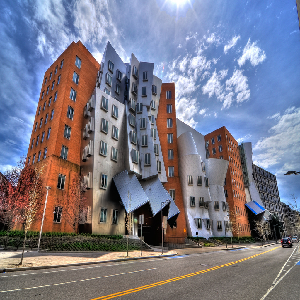

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Upload content image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Загрузить основное фото</font></b>

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
os.rename(fn, fn.replace(" ", ""))
fn = fn.replace(" ", "")
content_img = "content." + fn.split(".")[-1]
!mv -f $fn $content_img

im = Image.open(content_img)
(width, height) = im.size
content_img_max = max(width, height)
content_img_min = min(width, height)

display(Image.open(content_img).resize((300, 300)))

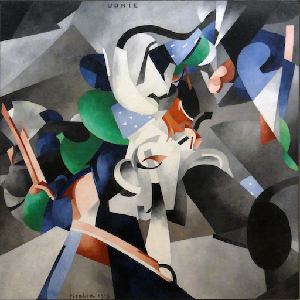

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Upload style image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Загрузить фото со стилем</font></b>

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
os.rename(fn, fn.replace(" ", ""))
fn = fn.replace(" ", "")
style_img = "style." + fn.split(".")[-1]
!mv -f $fn $style_img

im = Image.open(style_img)
(width, height) = im.size
style_img_max = max(width, height)
style_img_min = min(width, height)

display(Image.open(style_img).resize((300, 300)))

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Style Transfer</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Перенести стиль из фото на видео</font></b>
%%time
!rm -rf /content/pytorch-AdaIN/output/content_stylized_style.jpg
!CUDA_VISIBLE_DEVICES=0 python test.py --content $content_img --style $style_img --content_size $content_img_min --style_size $style_img_min
FINAL_IMAGE_PATH = '/content/pytorch-AdaIN/output/content_stylized_style.jpg'

CPU times: user 32.9 ms, sys: 14.7 ms, total: 47.5 ms
Wall time: 11.2 s


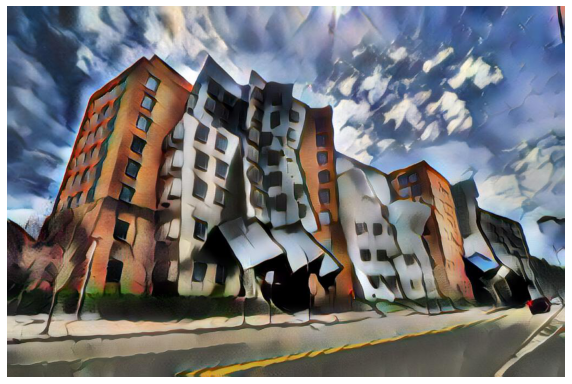

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Open the final image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Открыть итоговый результат</font></b>
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.imshow(img)

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Download the final image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Скачать итоговый результат</font></b>
files.download(FINAL_IMAGE_PATH)